<a href="https://colab.research.google.com/github/KiranKokateGitHub/Fraud-Detection_Macine-Learning/blob/main/Kiran_Kokate_INSAID_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's load dartaset
import pandas as pd
path = '/content/drive/MyDrive/Data science assignments_dataset files/Fraud.csv'
df = pd.read_csv(path)      # create dataframe names as df.
df.head()                   # let's see first 5 rows of the dataframe.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Display basic information about the dataframe to understand its structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Let's Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


so it means that we have no null values in our dataset.

In [ ]:
# Let's Check for outliers using box plots. Here we need to check outliers with respect to the amount beacause it is the diciding parameter.
import numpy as np
amount = df['amount'].values
q1 = np.percentile(amount, 25)         # find 25 percentile
q3 = np.percentile(amount, 75)         # find 75 percentile
iqr = q3 - q1                           # find IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in amount if x < lower_bound or x > upper_bound]
print('Number of outliers present in datset:',len(outliers))
print('Outliers in percentage(%):',len(outliers)/len(amount)*100)

Number of outliers present in datset: 338078
Outliers in percentage(%): 5.313502928039078


In [ ]:
# As outliers are only 5.31 %, so let's remove it form dataframe.
df = df[~df['amount'].isin(outliers)]

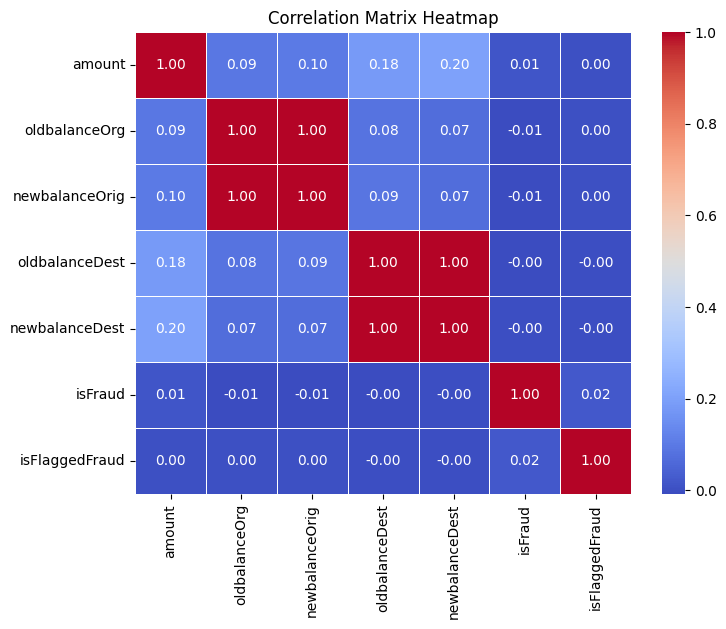

In [ ]:
# Check for multicollinearity among numerical columns
num_col = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]
# create a correlation matrix
correlation_matrix = num_col.corr()
# Plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

so here we have fouunda strong positive(i.e. 100%) correlation between 'oldbalanceorg and newbalanceorig' also between 'oldbalancedest and newbalancedest'.

In [ ]:
#Create new features that might capture underlying patterns better than the original features.
df['balance_diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
